# Model performance metrics

## Our model

In [32]:
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    average_precision_score,
    confusion_matrix,
    f1_score,
    matthews_corrcoef,
    precision_recall_curve,
    precision_score,
    recall_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    RocCurveDisplay,
)

from src.preprocessing import get_preprocessed_data

In [7]:
model = joblib.load(r"../models/black_box_xgboost.pkl")

In [8]:
df, prob, predictions, true_labels, _ = get_preprocessed_data(scale=True)

# Convert to numpy arrays
X = df.values.astype(np.float32)
y = true_labels.values.astype(np.int32)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
# Make predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Optimize threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
optimal_threshold_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_idx]

y_pred = (y_pred_proba >= optimal_threshold).astype(int)

In [20]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)
mcc = matthews_corrcoef(y_test, y_pred)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize="all")
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "roc_auc": roc_auc,
    "avg_precision": avg_precision,
    "mcc": mcc,
    "specificity": specificity,
    "sensitivity": sensitivity,
    "confusion_matrix": cm,
    "optimal_threshold": optimal_threshold,
}

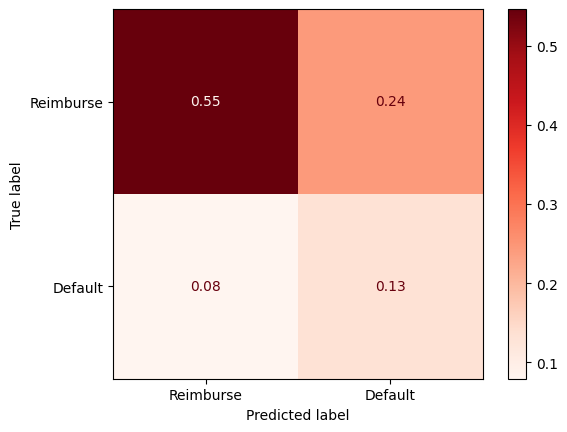

In [24]:
# Confusion matrix display
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["Reimburse", "Default"]
)
disp.plot(values_format=".2f", cmap="Reds")

In [ ]:
for metric in metrics:
    print(
        f"{metric}: {metrics[metric] * 100:.2f}%"
        if isinstance(metrics[metric], float)
        else ""
    )

accuracy: 67.78%
precision: 35.08%
recall: 62.40%
f1: 44.91%
roc_auc: 71.97%
avg_precision: 40.65%
mcc: 26.63%
specificity: 69.21%
sensitivity: 62.40%




AUC: 0.7197155045401602


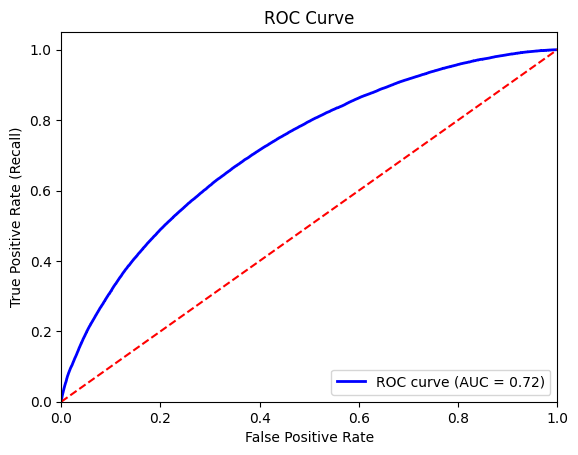

In [34]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")  # random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

## Professor's model

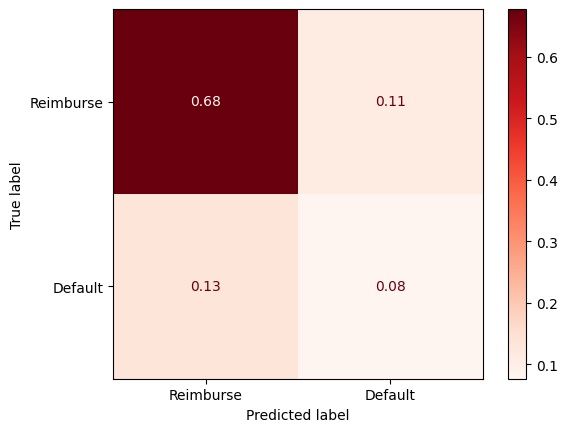

In [38]:
cm = confusion_matrix(true_labels, predictions, normalize="all")

# Confusion matrix display
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["Reimburse", "Default"]
)
disp.plot(values_format=".2f", cmap="Reds")

In [45]:
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)
roc_auc = roc_auc_score(true_labels, prob)
avg_precision = average_precision_score(true_labels, prob)
mcc = matthews_corrcoef(true_labels, predictions)

metrics = [accuracy, precision, recall, f1, roc_auc, avg_precision, mcc]

In [48]:
for metric in metrics:
    print(f"{metric * 100:.2f}%" if isinstance(metric, float) else "")

75.46%
40.74%
36.52%
38.51%
70.39%
38.15%
23.29%


AUC: 0.7038680360311652


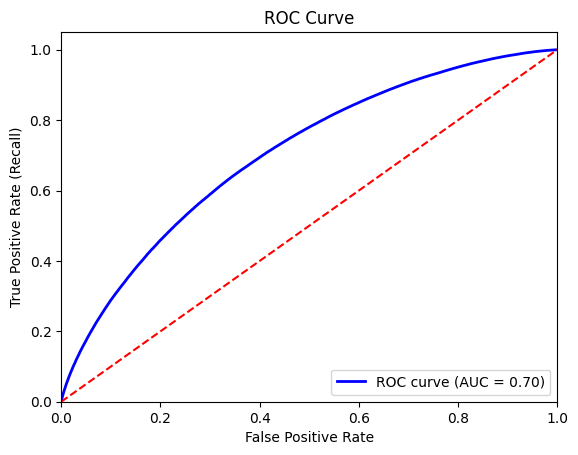

In [39]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, prob)

# Compute AUC
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")  # random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()